# Goal of the Project: 


In this project, we aim to develop a Social Media Sentiment Analysis system to assist organizations, including platforms like Facebook and Twitter. The objective is to understand and analyze user sentiments, enabling the organization to better serve users by providing the information or objects they are searching for

In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv("sentimentdataset.csv")
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [3]:
#droping the extra columns 

In [4]:
df=df.drop('Unnamed: 0.1',axis=1)

In [5]:
# renaming the column unnamed to S.no: 

In [6]:
df.rename(columns={'Unnamed: 0':'S.no'},inplace=True)

In [7]:
df.isnull().sum()

S.no         0
Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [9]:
df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()

In [10]:
# in the above cell we can see that no null value is there 

In [11]:
#let check the data column type 

In [12]:
df.dtypes

S.no                  int64
Text                 object
Sentiment            object
Timestamp    datetime64[ns]
User                 object
Platform             object
Hashtags             object
Retweets            float64
Likes               float64
Country              object
Year                  int32
Month                 int32
Day                   int32
Hour                  int64
dtype: object

In [13]:
import matplotlib.pyplot as plt 

In [14]:
#:- let plot top 10 sentiment to check the trend  

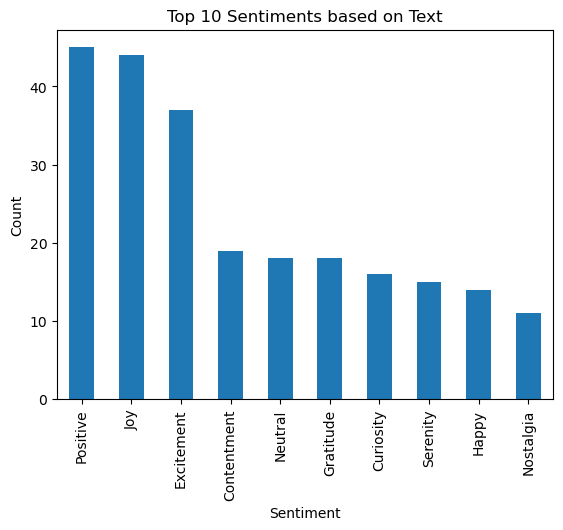

In [15]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [16]:
df['Platform'].value_counts()

Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

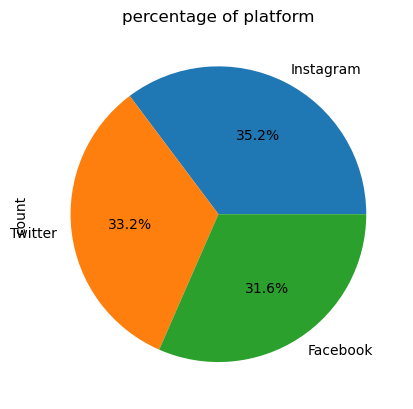

In [17]:
df['Platform'].value_counts().plot(kind='pie',autopct= '%1.1f%%')
plt.title('percentage of platform')
#plt.legend()
plt.show()

In [18]:
!pip install networkx

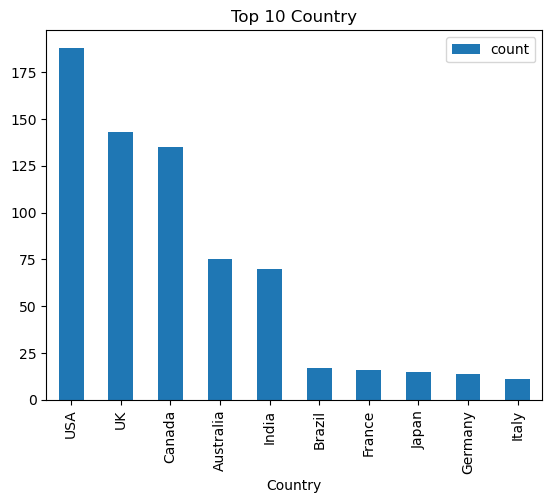

In [21]:
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Country')
plt.legend()
#colors=['red']
plt.show()

# lets check the top 10 hashtags

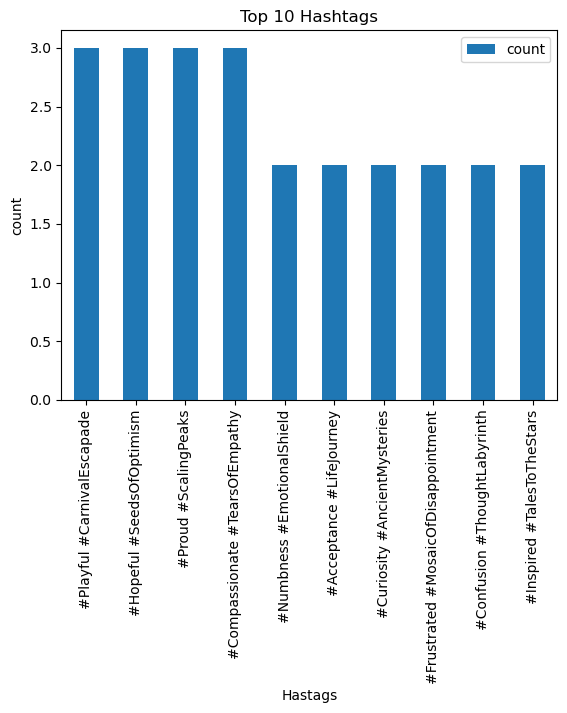

In [22]:
df['Hashtags'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Hashtags')
plt.xlabel('Hastags')
plt.ylabel('count')
plt.legend()
plt.show()

In [ ]:
#et check the top 10 hashtags retweeted

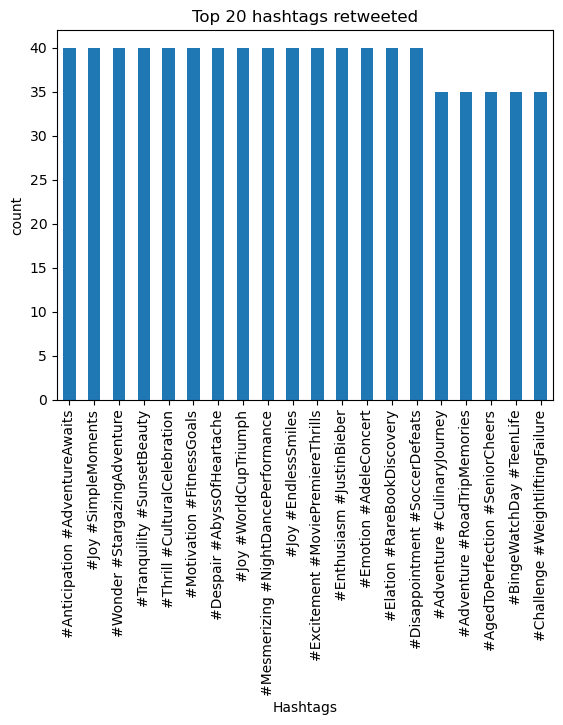

In [23]:
H_R=df.groupby('Hashtags')['Retweets'].max().nlargest(20).sort_values(ascending=False).plot(kind='bar')
plt.title('Top 20 hashtags retweeted')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

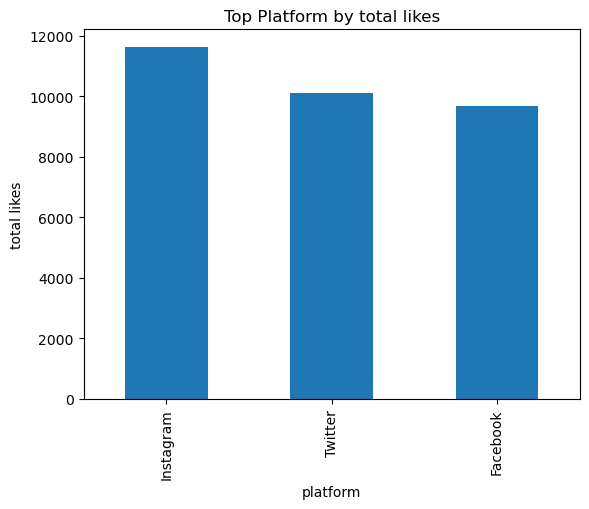

In [24]:
top_likes=df.groupby('Platform')['Likes'].sum().nlargest(10)
top_likes.plot(kind='bar')
color=['red']
plt.title('Top Platform by total likes')
plt.xlabel('platform')
plt.ylabel('total likes')
plt.show()

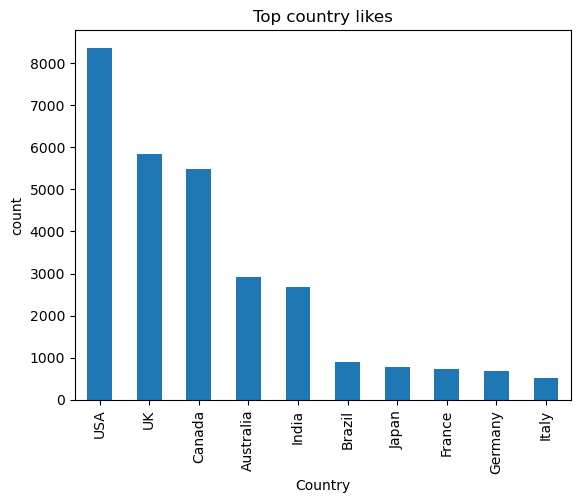

In [25]:
top_country_likes=df.groupby('Country')['Likes'].sum().nlargest(10)
top_country_likes.plot(kind='bar')
plt.title('Top country likes')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()

In [ ]:
#lets check the segment use according to the platform 

In [28]:
Facebook=df[df['Platform']=='Facebook']
Twitter=df[df['Platform']=='Twitter']
Instagram=df[df['Platform']=='Instagram']

Facebook


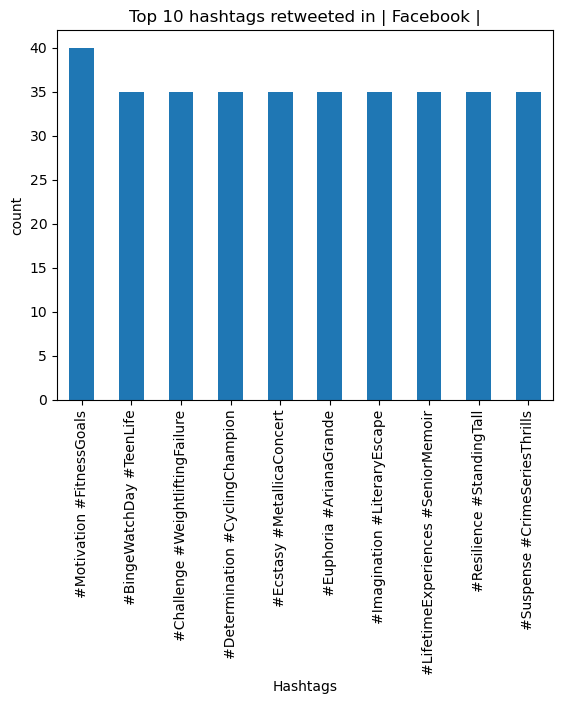

In [31]:
print('Facebook')
H_R_f=Facebook.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_f.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in | Facebook |')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

In [26]:
#lets check the total user according to the likes based on tweet 

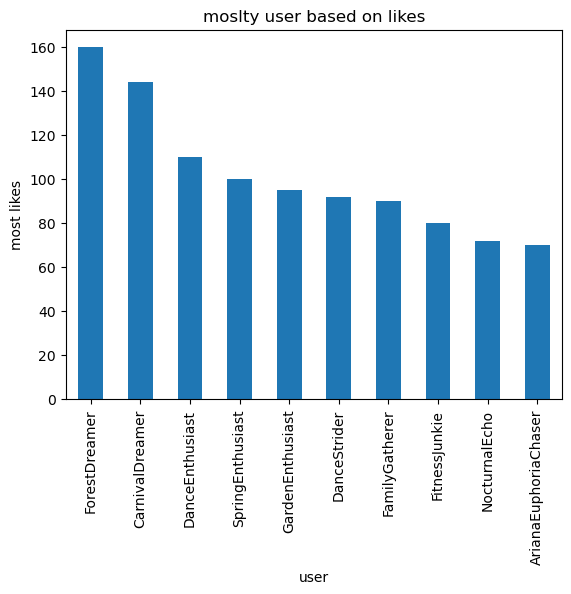

In [36]:
top_likes_platfrom=Facebook.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platfrom.plot(kind='bar')
plt.title('moslty user based on likes')
plt.xlabel('user')
plt.ylabel("most likes")
plt.show()

In [38]:
import seaborn as sns 

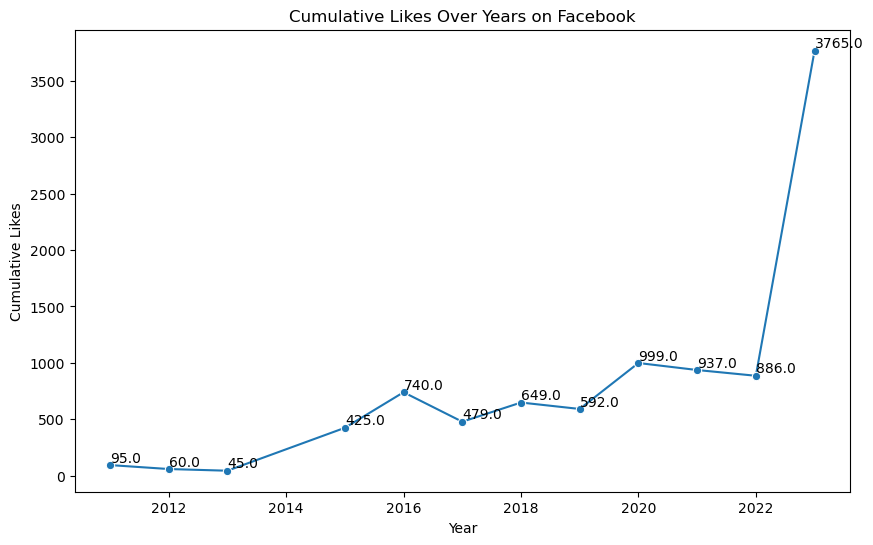

In [40]:
f = Facebook.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

In [41]:
#let check for the retweet over year facebook

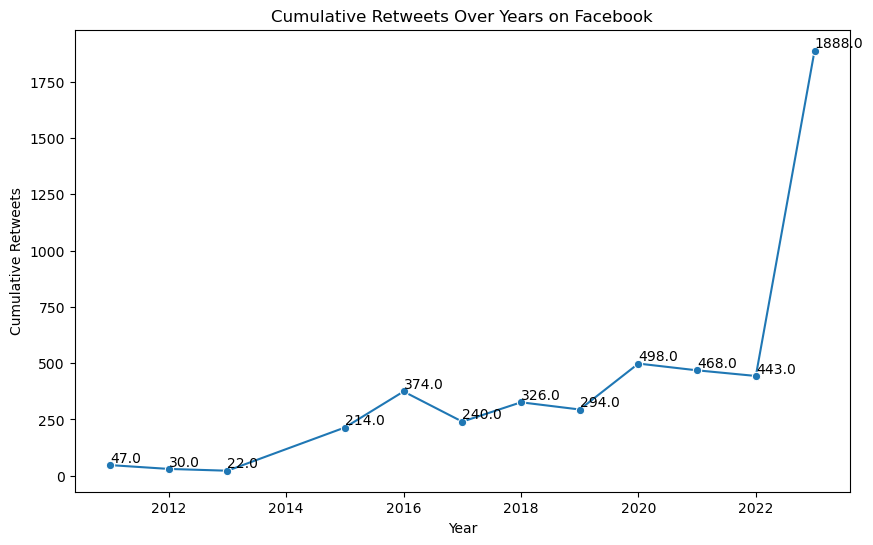

In [42]:
f = Facebook.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

# Twitter

In [43]:
#let see the top 10 hasgtag retweeted 

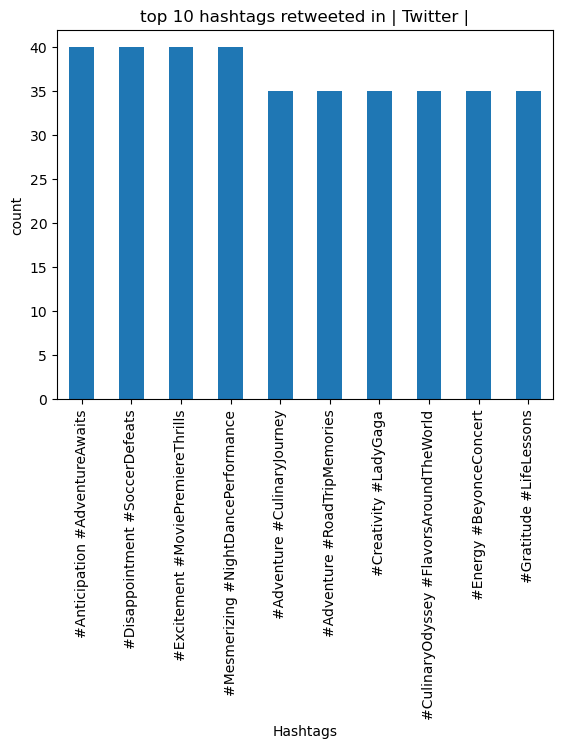

In [47]:
hr=Twitter.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
hr.plot(kind='bar')
plt.title('top 10 hashtags retweeted in | Twitter |')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

In [48]:
#let check which tweet category likes the most 

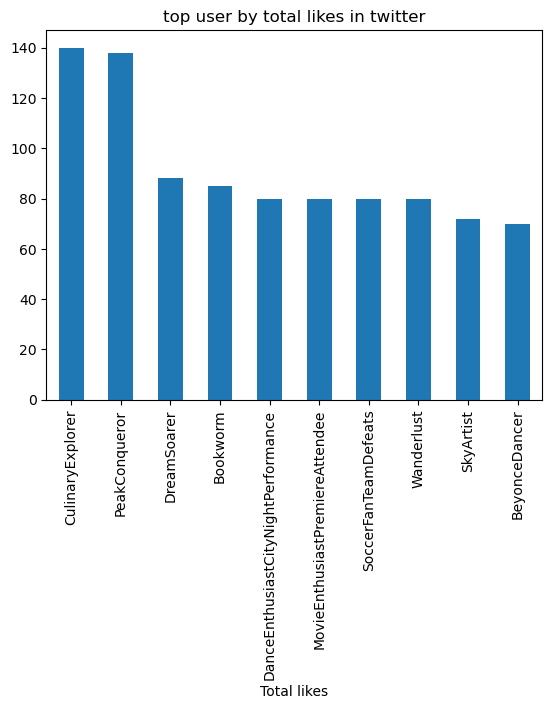

In [51]:
t_likes=Twitter.groupby('User')['Likes'].sum().nlargest(10)
t_likes.plot(kind='bar')
plt.title('top user by total likes in twitter')
plt.xlabel('User')
plt.xlabel('Total likes')
plt.show()

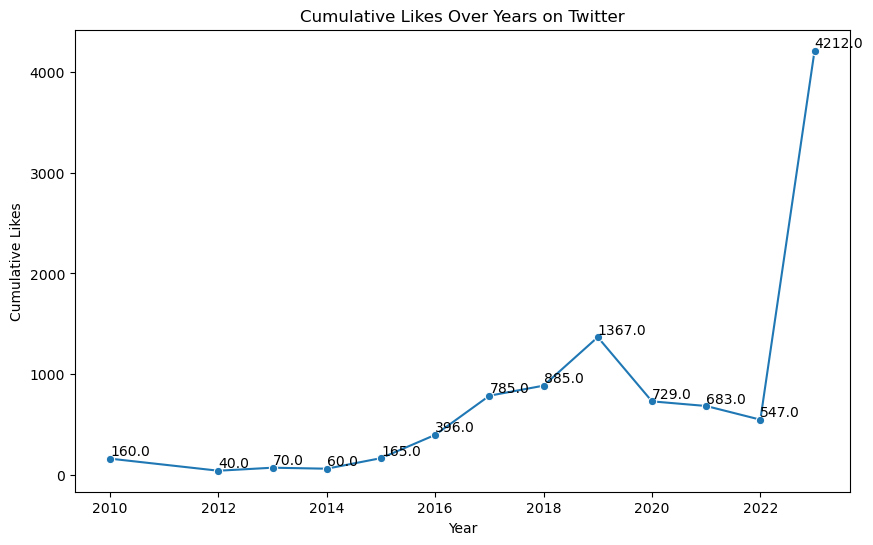

In [52]:
f = Twitter.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

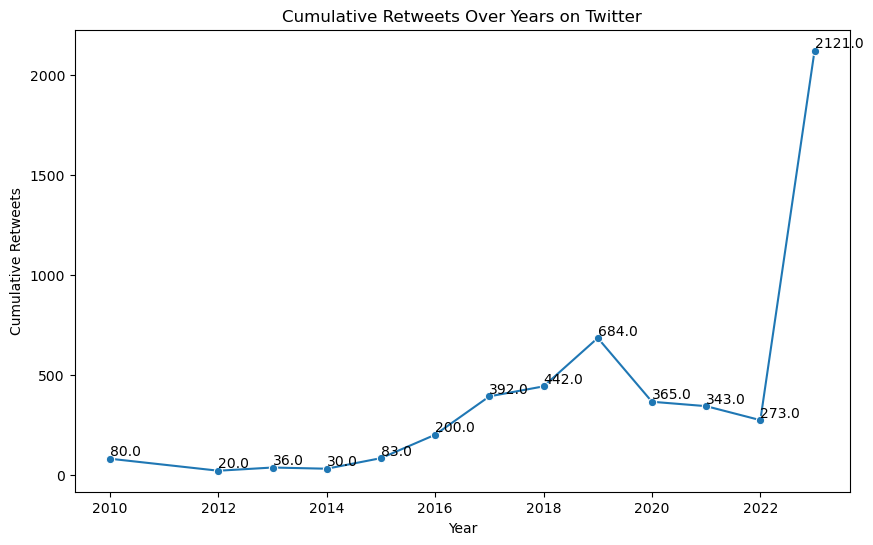

In [53]:
f = Twitter.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

# instagram

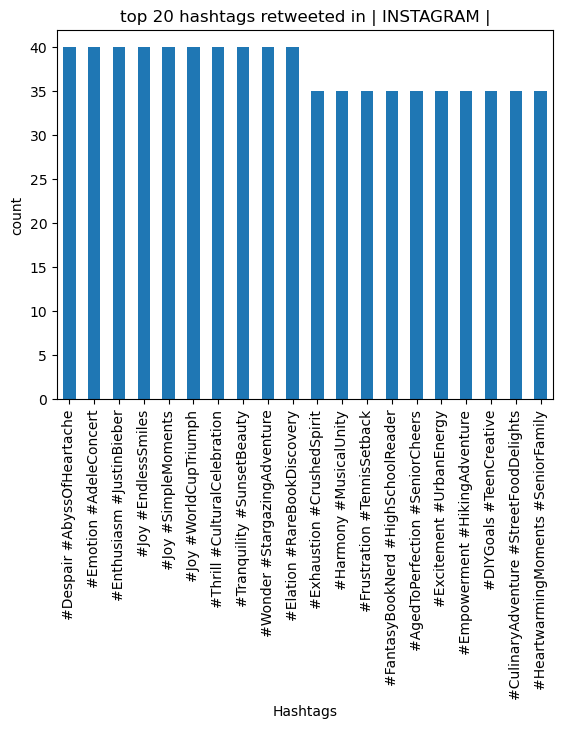

In [58]:
hr_i=Instagram.groupby('Hashtags')['Retweets'].max().nlargest(20).sort_values(ascending=False)
hr_i.plot(kind='bar')
plt.title('top 20 hashtags retweeted in | INSTAGRAM |')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

In [59]:
#lets check which hashtags user like the most 

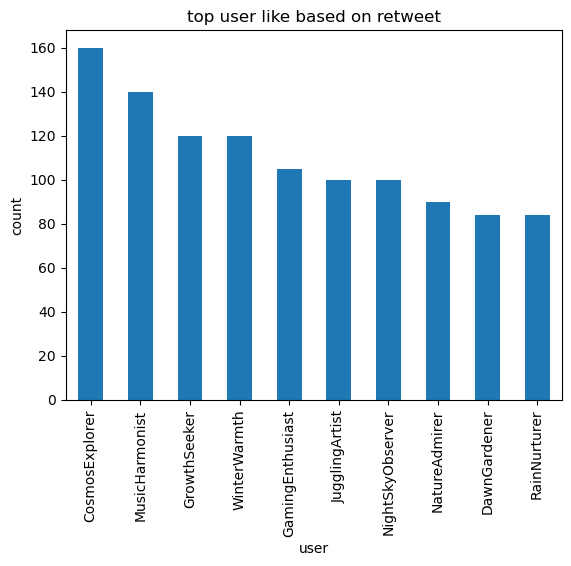

In [61]:
top_likes_i=Instagram.groupby('User')['Likes'].sum().nlargest(10)
top_likes_i.plot(kind='bar')
plt.xlabel('user')
plt.ylabel('count')
plt.title('top user like based on retweet')
plt.show()

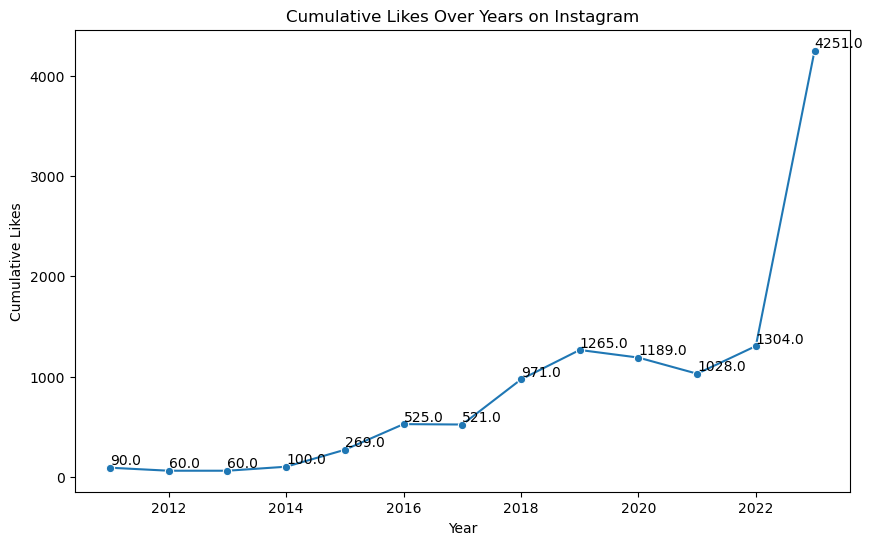

In [62]:
f = Instagram.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

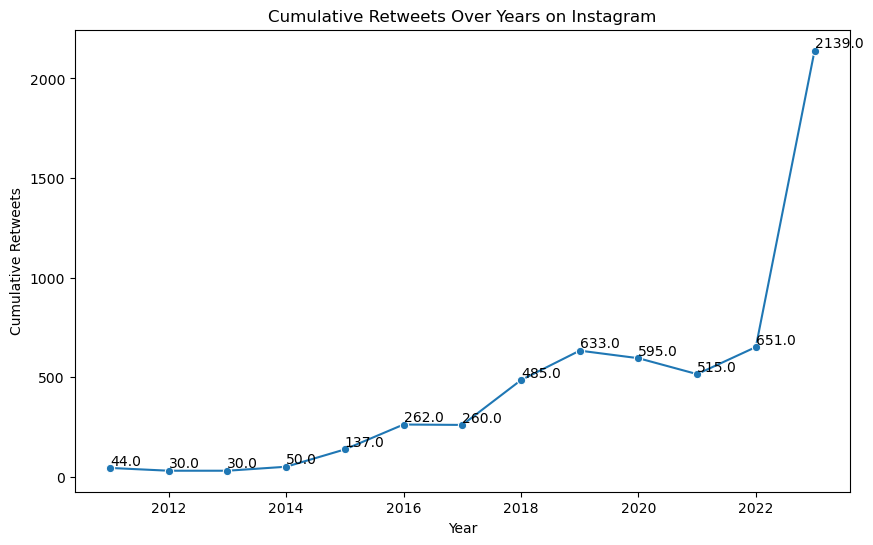

In [63]:
f = Instagram.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()